In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

In [4]:
df=pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


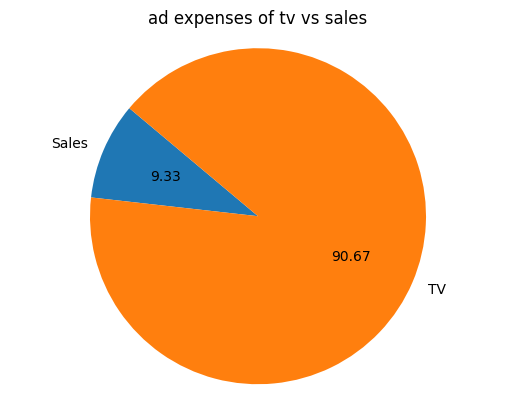

In [7]:
total_sales=df["Sales"].sum()
Total_Tv_expenditure=df["TV"].sum()
labels="Sales","TV"
plt.pie([total_sales,Total_Tv_expenditure],labels=labels,autopct="%1.2f",startangle=140)
plt.title("ad expenses of tv vs sales")
plt.axis("equal")
plt.show()

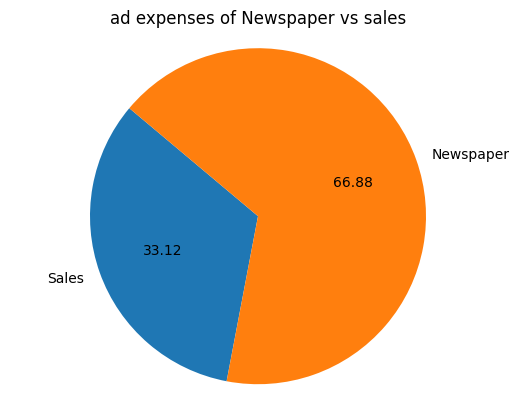

In [8]:
total_sales=df["Sales"].sum()
Total_Newspaper_expenditure=df["Newspaper"].sum()
labels="Sales","Newspaper"
plt.pie([total_sales,Total_Newspaper_expenditure],labels=labels,autopct="%1.2f",startangle=140)
plt.title("ad expenses of Newspaper vs sales")
plt.axis("equal")
plt.show()

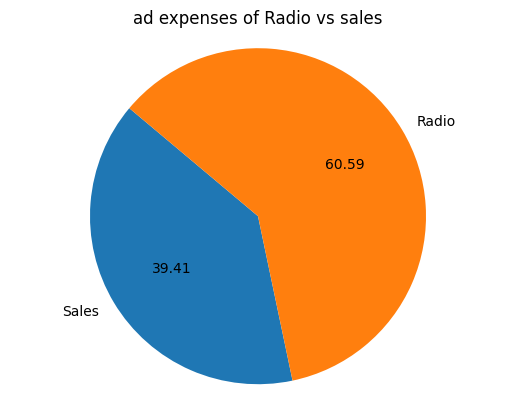

In [9]:
total_sales=df["Sales"].sum()
Total_Radio_expenditure=df["Radio"].sum()
labels="Sales","Radio"
plt.pie([total_sales,Total_Radio_expenditure],labels=labels,autopct="%1.2f",startangle=140)
plt.title("ad expenses of Radio vs sales")
plt.axis("equal")
plt.show()

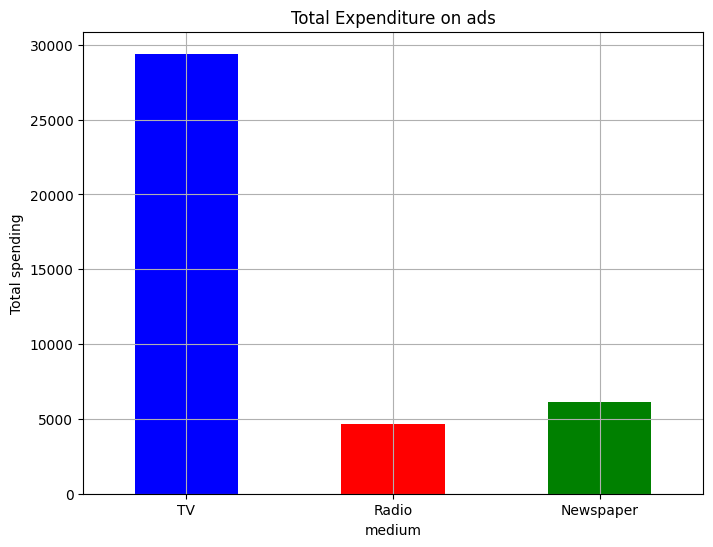

In [17]:
total_spending=df[["TV","Radio","Newspaper"]].sum()
plt.figure(figsize=(8,6))
total_spending.plot(kind="bar",color=["blue","red","green"])
plt.title("Total Expenditure on ads")
plt.xlabel("medium")
plt.ylabel("Total spending")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

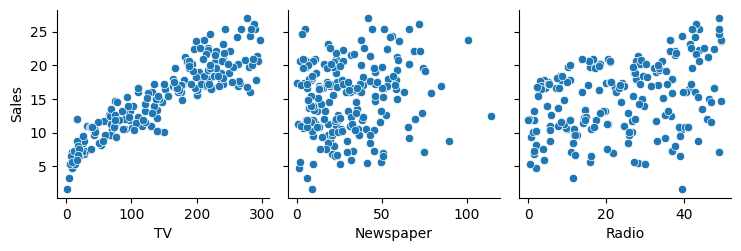

In [10]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', kind='scatter')
plt.show()

In [ ]:
features=["TV","Newspaper","Radio"]
X=df[features]
y=df["Sales"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=RandomForestRegressor(n_estimators=50,random_state=42,max_depth=10)
model.fit(X_train,y_train)


RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42)

In [ ]:
print(X_train)

        TV  Newspaper  Radio
79   116.0       23.1    7.7
197  177.0        6.4    9.3
38    43.1       35.1   26.7
24    62.3       18.3   12.6
122  224.0       15.6    2.4
..     ...        ...    ...
106   25.0       29.7   11.0
14   204.1       46.0   32.9
92   217.7       59.0   33.5
179  165.6       17.6   10.0
102  280.2       21.4   10.1

[160 rows x 3 columns]


In [ ]:
print(y_train)

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64


In [ ]:
print(X_test)

        TV  Newspaper  Radio
95   163.3       52.9   31.6
15   195.4       52.9   47.7
30   292.9       43.2   28.3
158   11.7       45.2   36.9
128  220.3        3.2   49.0
115   75.1       52.7   35.0
69   216.8       27.2   43.9
170   50.0       18.4   11.6
174  222.4       13.1    3.4
45   175.1       31.5   22.5
66    31.5        2.2   24.6
182   56.2       29.7    5.7
165  234.5       84.8    3.4
78     5.4        9.4   29.9
186  139.5       26.6    2.1
177  170.2       35.2    7.8
56     7.3       41.4   28.1
152  197.6       14.2   23.3
82    75.3       32.5   20.3
68   237.4       11.0   27.5
124  229.5       74.2   32.3
16    67.8      114.0   36.6
148   38.0       11.9   40.3
93   250.9       72.3   36.5
65    69.0        0.9    9.3
60    53.5       21.4    2.0
84   213.5       33.8   43.0
67   139.3       10.2   14.5
125   87.2       25.9   11.8
132    8.4        2.1   27.2
9    199.8       21.2    2.6
18    69.2       18.3   20.5
55   198.9       60.0   49.4
75    16.9    

In [ ]:
print(y_test)

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64


In [ ]:
y_pred=model.predict(X_test)
print(y_pred)

[17.20033333 22.578      19.7447      6.642      22.924      13.412
 22.816       9.4245     16.8653     16.77447619  7.62       10.228
 17.3585      4.944      11.512      16.98331429  6.374      17.61510952
 11.62057778 19.82320952 20.02245    13.356      10.024      22.05791667
 10.9942      9.9035     22.746      12.6203     11.2593      5.16
 16.572      11.271      23.106      10.024      19.50258333 20.35661667
 10.974      19.79085    12.5274      7.436     ]


In [ ]:
accu_score=model.score(X_train,y_train)*100
accuracy_score=model.score(X_test,y_test)*100
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)*100
print(mse)
print(r2)
print(accu_score)
print(accuracy_score)

1.2911050067851626
95.82181538267194
99.07853928756111
95.82181538267194


In [ ]:
new_data = [[100.3, 30.0, 100.0]]
predicted_sales = model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: [15.046]


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
